# Australian photovoltaic trade 2014

This notebook looks at the photovoltaic trade to/from Australia as captured by comtrade.

Which countries were the top importers of photovoltaics to Australia is 2014?
Which countries did Australia export the most photovoltaics to in 2014?

## Load data and restrict to useful columns

In [1]:
%matplotlib inline
from pandas import *

## comtrade API call for Bicycles, other cycles, not motorized 2014 monthly Australia 
URL = "http://comtrade.un.org/api/get?max=5000&type=C&freq=M&px=HS&ps=2014&r=36&p=all&rg=2%2C1&cc=854140&fmt=csv"
COLUMNS=['Year', 'Period','Trade Flow','Reporter', 'Partner', 'Commodity','Commodity Code','Trade Value (US$)']

pv = read_csv(URL,dtype={'Commodity Code':str, 'Reporter Code':str})
pv=pv[COLUMNS]
pv.head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
0,2014,201401,Imports,Australia,World,Photosensitive/photovoltaic/LED semiconductor ...,854140,39923929
1,2014,201401,Exports,Australia,World,Photosensitive/photovoltaic/LED semiconductor ...,854140,956475
2,2014,201401,Imports,Australia,Austria,Photosensitive/photovoltaic/LED semiconductor ...,854140,271761
3,2014,201401,Exports,Australia,Bolivia,Photosensitive/photovoltaic/LED semiconductor ...,854140,24189
4,2014,201401,Exports,Australia,Brazil,Photosensitive/photovoltaic/LED semiconductor ...,854140,202


## Split into imports and exports datasets

In [2]:
trade_flows = pv.groupby('Trade Flow')
trade_flows.groups.keys()

dict_keys(['Exports', 'Imports'])

In [3]:
pv_imports = trade_flows.get_group("Imports")
pv_imports.head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
0,2014,201401,Imports,Australia,World,Photosensitive/photovoltaic/LED semiconductor ...,854140,39923929
2,2014,201401,Imports,Australia,Austria,Photosensitive/photovoltaic/LED semiconductor ...,854140,271761
5,2014,201401,Imports,Australia,Canada,Photosensitive/photovoltaic/LED semiconductor ...,854140,36159
7,2014,201401,Imports,Australia,China,Photosensitive/photovoltaic/LED semiconductor ...,854140,33450462
9,2014,201401,Imports,Australia,Czech Rep.,Photosensitive/photovoltaic/LED semiconductor ...,854140,20092


In [4]:
pv_exports = trade_flows.get_group('Exports')
pv_exports.head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
1,2014,201401,Exports,Australia,World,Photosensitive/photovoltaic/LED semiconductor ...,854140,956475
3,2014,201401,Exports,Australia,Bolivia,Photosensitive/photovoltaic/LED semiconductor ...,854140,24189
4,2014,201401,Exports,Australia,Brazil,Photosensitive/photovoltaic/LED semiconductor ...,854140,202
6,2014,201401,Exports,Australia,Sri Lanka,Photosensitive/photovoltaic/LED semiconductor ...,854140,121380
8,2014,201401,Exports,Australia,China,Photosensitive/photovoltaic/LED semiconductor ...,854140,122522


## Get totals by trading partner for bicycle exports

Sort and display list, and show top 10 compared to world in a bar plot.

In [6]:
partner_totals_exports = pv_exports.groupby(['Partner'])['Trade Value (US$)'].aggregate(sum)
partner_totals_exports_sorted = partner_totals_exports.sort(ascending=False, inplace=False)
partner_totals_exports_sorted

Partner
World                       19444197
United States of America     4072410
China                        3332125
New Zealand                  2102075
China, Hong Kong SAR         1419720
Saudi Arabia                 1059326
Japan                        1044779
Fiji                          833138
Germany                       612393
Thailand                      592486
Sri Lanka                     553528
Brazil                        510585
Mexico                        386473
Papua New Guinea              334329
Malaysia                      299867
Chile                         287366
Singapore                     250452
France                        197424
Netherlands                   150227
French Polynesia              143344
United Kingdom                109275
United Arab Emirates           85879
Cook Isds                      80684
Ethiopia                       69411
Spain                          61897
Indonesia                      61113
Uzbekistan                    

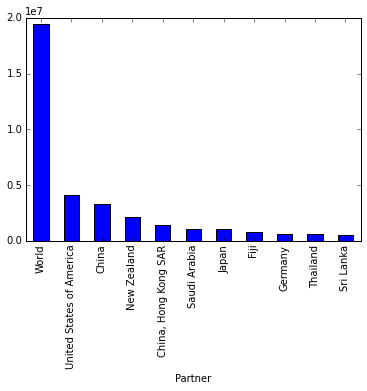

In [7]:
partner_totals_exports_sorted.head(11).plot(kind="bar")

## Get totals by trading partner for bicycle imports

Sort and display list, and show top 10 compared to world in a bar plot.

In [8]:
partner_totals_imports = pv_imports.groupby(['Partner'])['Trade Value (US$)'].aggregate(sum)
partner_totals_imports_sorted = partner_totals_imports.sort(ascending=False, inplace=False)
partner_totals_imports_sorted

Partner
World                       657370983
China                       456169691
Malaysia                     97305188
Singapore                    23725824
Germany                      21437766
Rep. of Korea                15745942
China, Hong Kong SAR         12555514
Other Asia, nes               9699650
United States of America      5230053
Japan                         2401191
Mexico                        2053881
Austria                       1367421
United Kingdom                1289636
Turkey                        1194783
Philippines                    996628
Australia                      783973
Switzerland                    688895
Czech Rep.                     643732
Thailand                       560788
Italy                          449230
Canada                         423896
New Zealand                    348843
Netherlands                    316281
India                          275683
France                         206567
Israel                         186906
Viet

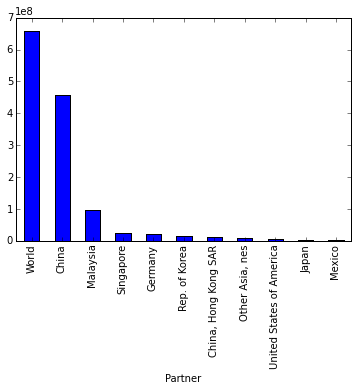

In [9]:
partner_totals_imports_sorted.head(11).plot(kind="bar")